In [30]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [31]:
data = pd.read_csv('/content/daily_weather.csv')

In [32]:
data.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [33]:
data

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000
...,...,...,...,...,...,...,...,...,...,...,...
1090,1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000
1091,1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000
1092,1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000
1093,1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000


In [34]:
data[data.isnull().any(axis=1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


In [35]:
del data['number']

In [36]:
before_rows = data.shape[0]
print(before_rows)

1095


In [37]:
data = data.dropna()

In [38]:
after_rows = data.shape[0]
print(after_rows)

1064


In [39]:
before_rows - after_rows

31

In [40]:
clean_data = data.copy()
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > 45)*1
print(clean_data['high_humidity_label'])

0       0
1       0
2       0
3       0
4       1
       ..
1090    0
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int64


In [41]:
y=clean_data[['high_humidity_label']].copy()
y

,high_humidity_label
0,0
1,0
2,0
3,0
4,1
...,...
1090,0
1091,1
1092,1
1093,1


In [42]:
clean_data['relative_humidity_3pm'].head()

0    36.160000
1    19.426597
2    14.460000
3    12.742547
4    76.740000
Name: relative_humidity_3pm, dtype: float64

In [43]:
y.head()

,high_humidity_label
0,0
1,0
2,0
3,0
4,1


In [44]:
morning_features = ['air_pressure_9am','air_temp_9am','avg_wind_direction_9am','avg_wind_speed_9am',
        'max_wind_direction_9am','max_wind_speed_9am','rain_accumulation_9am',
        'rain_duration_9am']

In [45]:
X = clean_data[morning_features].copy()

In [46]:
X.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am'],
      dtype='object')

In [47]:
y.columns

Index(['high_humidity_label'], dtype='object')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=324)

In [49]:
type(X_train)
type(X_test)
type(y_train)
type(y_test)
X_train.head()
y_train.describe()

,high_humidity_label
count,744.000000
mean,0.317204
std,0.465701
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [50]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [51]:
type(humidity_classifier)

sklearn.tree._classes.DecisionTreeClassifier

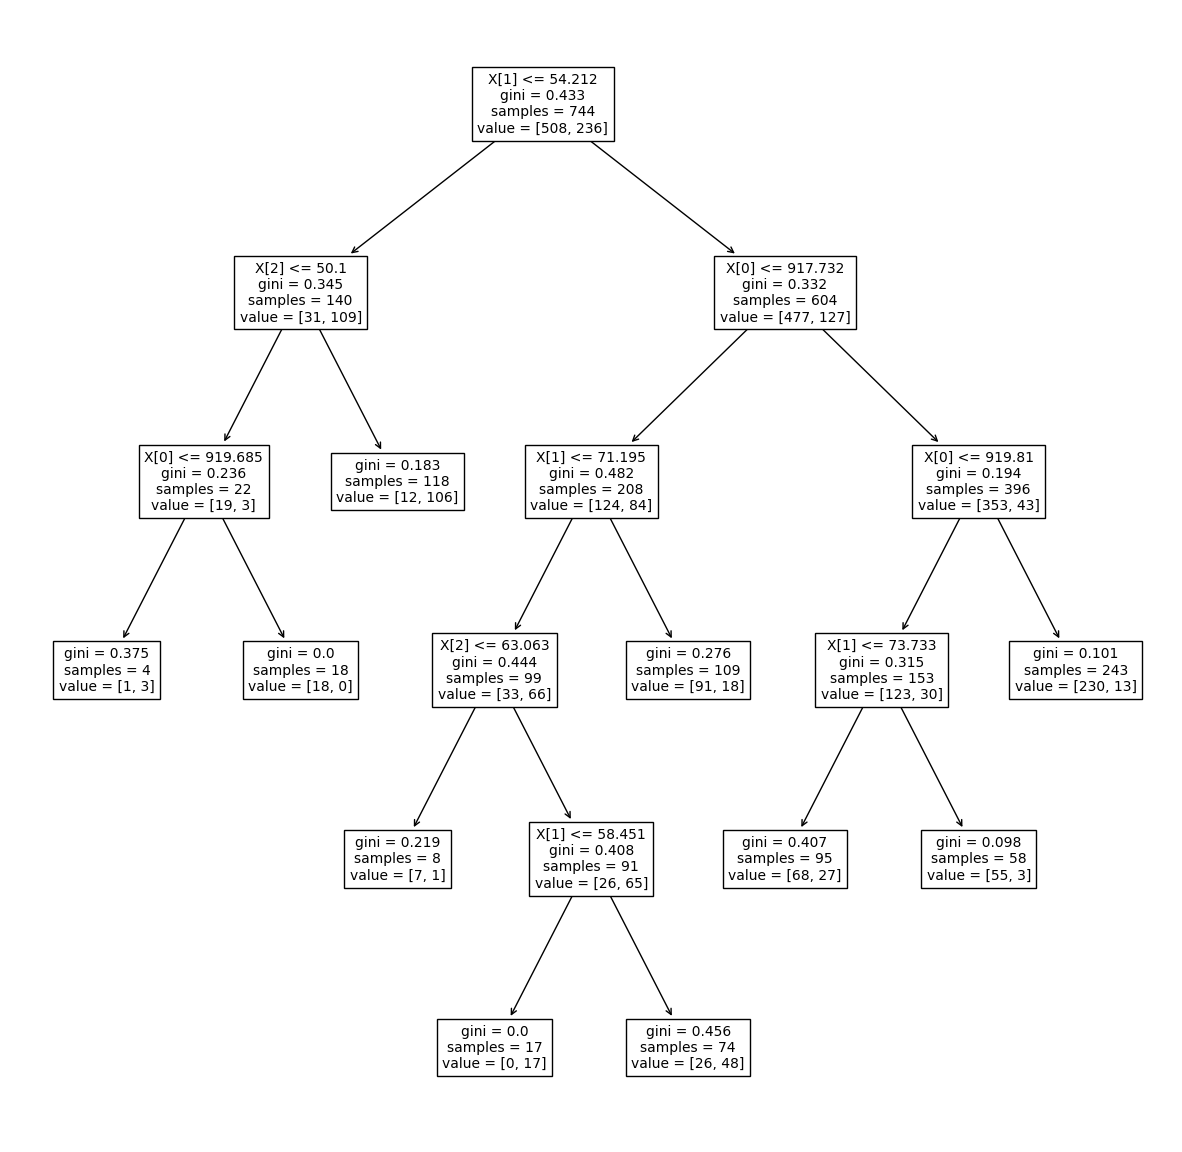

In [52]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi']=100
plt.subplots(figsize=(15,15))
tree.plot_tree(humidity_classifier,fontsize=10)
plt.show()

In [53]:
predictions = humidity_classifier.predict(X_test)

In [54]:
predictions[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [55]:
y_test['high_humidity_label'][:20]

456     0
845     0
693     0
259     1
723     1
224     1
300     1
442     0
585     0
1057    1
770     1
81      0
150     0
493     1
321     0
39      0
430     0
109     0
1005    0
496     0
Name: high_humidity_label, dtype: int64

In [56]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.81875